In [240]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
from pandas import DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

In [278]:
df=pd.read_csv('D:\\data3.csv')
print(df.shape)
df.head()

(365, 13)


,date,counts,tem_average,tem_min,tem_max,Daily precipitation,windSpeed_max,windSpeed_average,dewPointTemperature_average,relativeHumidity_average,Insolation_sum,Totalcloud_average,season
0,2019-04-01,37660,5.5,0.3,11.3,NaN,5.8,2.5,-8.4,39.8,23.42,1.3,1
1,2019-04-02,42029,6.7,1.3,13.0,NaN,6.1,2.2,-8.0,36.9,22.96,0.3,1
2,2019-04-03,43257,7.6,1.9,13.6,NaN,5.0,2.3,-7.3,36.1,22.61,0.3,1
3,2019-04-04,45681,9.2,3.0,15.7,NaN,5.0,2.5,-3.7,43.0,22.72,0.0,1
4,2019-04-05,45643,11.4,7.0,17.2,0.0,5.4,2.9,-4.1,41.0,20.11,3.0,1


In [279]:
df.describe()

,counts,tem_average,tem_min,tem_max,Daily precipitation,windSpeed_max,windSpeed_average,dewPointTemperature_average,relativeHumidity_average,Insolation_sum,Totalcloud_average,season
count,365.000000,365.000000,365.000000,365.000000,147.000000,365.000000,365.000000,365.000000,365.000000,363.000000,365.000000,365.000000
mean,55589.000000,13.960822,9.722192,18.884932,6.602721,4.396164,2.050959,4.972603,58.106027,13.928430,4.918904,2.660274
std,24830.107765,9.807559,9.920191,10.062487,12.373563,1.129785,0.670968,11.010800,14.768104,7.062214,3.035070,1.106765
min,1920.000000,-8.300000,-11.800000,-4.900000,0.000000,2.000000,0.600000,-20.400000,17.900000,0.750000,0.000000,1.000000
25%,32972.000000,5.500000,0.800000,9.900000,0.000000,3.600000,1.600000,-4.500000,46.800000,8.915000,2.300000,2.000000
50%,57020.000000,14.700000,9.500000,20.200000,1.200000,4.300000,1.900000,5.200000,58.000000,13.150000,5.000000,2.000000
75%,78874.000000,23.000000,18.900000,27.800000,7.500000,5.000000,2.300000,14.200000,67.300000,19.850000,7.500000,4.000000
max,95859.000000,31.600000,27.900000,36.800000,63.200000,11.800000,6.000000,25.000000,95.300000,28.890000,10.000000,4.000000


In [280]:
n=df.isnull().sum()
n

date                             0
counts                           0
tem_average                      0
tem_min                          0
tem_max                          0
Daily precipitation            218
windSpeed_max                    0
windSpeed_average                0
dewPointTemperature_average      0
relativeHumidity_average         0
Insolation_sum                   2
Totalcloud_average               0
season                           0
dtype: int64

<AxesSubplot:>

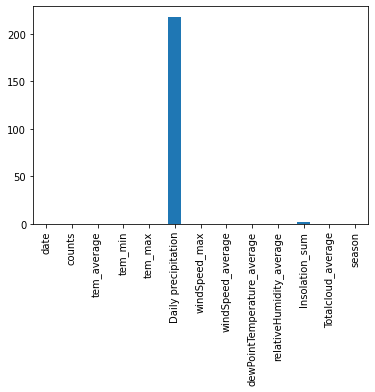

In [281]:
n.plot.bar()

In [282]:
df['Daily precipitation'].describe()

count    147.000000
mean       6.602721
std       12.373563
min        0.000000
25%        0.000000
50%        1.200000
75%        7.500000
max       63.200000
Name: Daily precipitation, dtype: float64

In [283]:
df['Insolation_sum'].describe()

count    363.000000
mean      13.928430
std        7.062214
min        0.750000
25%        8.915000
50%       13.150000
75%       19.850000
max       28.890000
Name: Insolation_sum, dtype: float64

In [284]:
drop_column=[ 'Daily precipitation']
df.drop(drop_column, axis=1, inplace=True)

In [285]:
n=df.isnull().sum()
n

date                           0
counts                         0
tem_average                    0
tem_min                        0
tem_max                        0
windSpeed_max                  0
windSpeed_average              0
dewPointTemperature_average    0
relativeHumidity_average       0
Insolation_sum                 2
Totalcloud_average             0
season                         0
dtype: int64

In [286]:
df=df.fillna(0)

In [287]:
n=df.isnull().sum()
n

date                           0
counts                         0
tem_average                    0
tem_min                        0
tem_max                        0
windSpeed_max                  0
windSpeed_average              0
dewPointTemperature_average    0
relativeHumidity_average       0
Insolation_sum                 0
Totalcloud_average             0
season                         0
dtype: int64

<AxesSubplot:xlabel='date', ylabel='counts'>

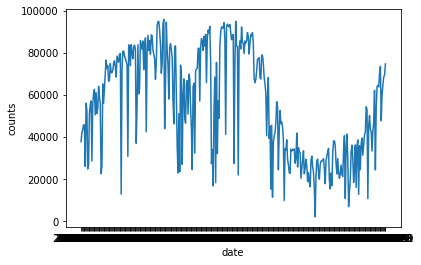

In [288]:
sns.lineplot(data=df, x="date", y="counts")

In [289]:
#문자열을 datetime 타입으로 변경
df['date'] = pd.to_datetime(df['date'], format="%Y-%m-%d")
# year, month, day 추출
df['year'] = pd.to_datetime(df['date'], format="%Y-%m-%d").apply(lambda x:x.year)
df['month'] = pd.to_datetime(df['date'], format="%Y-%m-%d").apply(lambda x:x.month)
df['day'] = pd.to_datetime(df['date'], format="%Y-%m-%d").apply(lambda x:x.day)
df.head(3)

,date,counts,tem_average,tem_min,tem_max,windSpeed_max,windSpeed_average,dewPointTemperature_average,relativeHumidity_average,Insolation_sum,Totalcloud_average,season,year,month,day
0,2019-04-01,37660,5.5,0.3,11.3,5.8,2.5,-8.4,39.8,23.42,1.3,1,2019,4,1
1,2019-04-02,42029,6.7,1.3,13.0,6.1,2.2,-8.0,36.9,22.96,0.3,1,2019,4,2
2,2019-04-03,43257,7.6,1.9,13.6,5.0,2.3,-7.3,36.1,22.61,0.3,1,2019,4,3


In [290]:
drop_columns=['date']
df.drop(drop_columns, axis=1, inplace=True)

In [291]:
df.head(3)

,counts,tem_average,tem_min,tem_max,windSpeed_max,windSpeed_average,dewPointTemperature_average,relativeHumidity_average,Insolation_sum,Totalcloud_average,season,year,month,day
0,37660,5.5,0.3,11.3,5.8,2.5,-8.4,39.8,23.42,1.3,1,2019,4,1
1,42029,6.7,1.3,13.0,6.1,2.2,-8.0,36.9,22.96,0.3,1,2019,4,2
2,43257,7.6,1.9,13.6,5.0,2.3,-7.3,36.1,22.61,0.3,1,2019,4,3


In [292]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

def rmsle(y, pred):
    log_y=np.log1p(y)
    log_pred=np.log1p(pred)
    squared_error=(log_y - log_pred)**2
    rmsle=np.sqrt(np.mean(squared_error))
    return rmsle

def rmse(y, pred):
    return np.sqrt(mean_squared_error(y, pred))

def evaluate_regr(y, pred):
    rmsle_val = rmsle(y, pred)
    rmse_val = rmse(y, pred)
    mae_val = mean_absolute_error(y, pred)
    print('RMSLE: {0:.3f}, RMSE: {1:.3f}, MAE: {2:.3f}'.format(rmsle_val, rmse_val, mae_val))

In [293]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso

y_target = df['counts']
X_features = df.drop(['counts'],axis=1,inplace=False)

X_train, X_test, y_train, y_test=train_test_split(X_features, y_target, test_size=0.3, random_state=0)

lr_reg=LinearRegression()
lr_reg.fit(X_train, y_train)
pred=lr_reg.predict(X_test)

evaluate_regr(y_test,pred)

RMSLE: 0.353, RMSE: 14603.215, MAE: 10763.334


In [294]:
def get_top_error_data(y_test, pred, n_tops=5):
    result_df = pd.DataFrame(y_test.values, columns=['real_count'])
    result_df['predicted_count']=np.round(pred)
    result_df['diff']=np.abs(result_df['real_count']-result_df['predicted_count'])
    
    print(result_df.sort_values('diff', ascending=False)[:n_tops])
    
get_top_error_data(y_test,pred,n_tops=5)

     real_count  predicted_count     diff
101       16631          65631.0  49000.0
37        43351          92149.0  48798.0
30        49047          84623.0  35576.0
27        12644          45789.0  33145.0
96        22789          54239.0  31450.0


<AxesSubplot:>

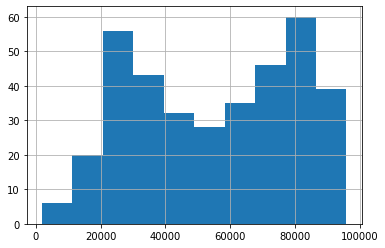

In [295]:
y_target.hist()

<AxesSubplot:>

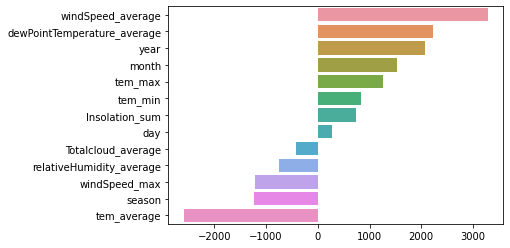

In [296]:
coef=pd.Series(lr_reg.coef_, index=X_features.columns)
coef_sort = coef.sort_values(ascending=False)
sns.barplot(x=coef_sort.values,y=coef_sort.index)

In [270]:
X_features_ohe = pd.get_dummies(X_features, columns=['month','day','season'])

In [260]:
X_train, X_test, y_train, y_test=train_test_split(X_features_ohe, y_target, test_size=0.3, random_state=0)

def get_model_predict(model, X_train, X_test, y_train, y_test, is_expm1=False):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    if is_expm1:
        y_test = np.expm1(y_test)
        pred = np.expm1(pred)
    print('###',model.__class__.__name__,'###')
    evaluate_regr(y_test, pred)
    
lr_reg=LinearRegression()
ridge_reg=Ridge(alpha=10)
lasso_reg=Lasso(alpha=0.01)

for model in [lr_reg, ridge_reg, lasso_reg]:
    get_model_predict(model, X_train, X_test, y_train, y_test, is_expm1=True)

### LinearRegression ###


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
drop_column=[ 'Daily precipitation']
df.drop(drop_column, axis=1, inplace=True)

In [271]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso

y_target = df['counts']
X_features = df.drop(['counts'],axis=1,inplace=False)

X_train, X_test, y_train, y_test=train_test_split(X_features_ohe, y_target, test_size=0.3, random_state=0)

lr_reg=LinearRegression()
lr_reg.fit(X_train, y_train)
pred=lr_reg.predict(X_test)

evaluate_regr(y_test,pred)

RMSLE: 0.391, RMSE: 15464.624, MAE: 11407.073


<AxesSubplot:>

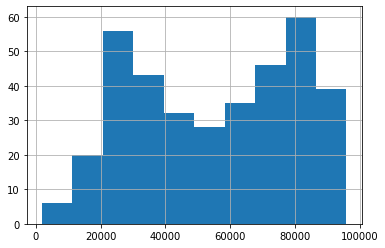

In [272]:
y_target.hist()

<AxesSubplot:>

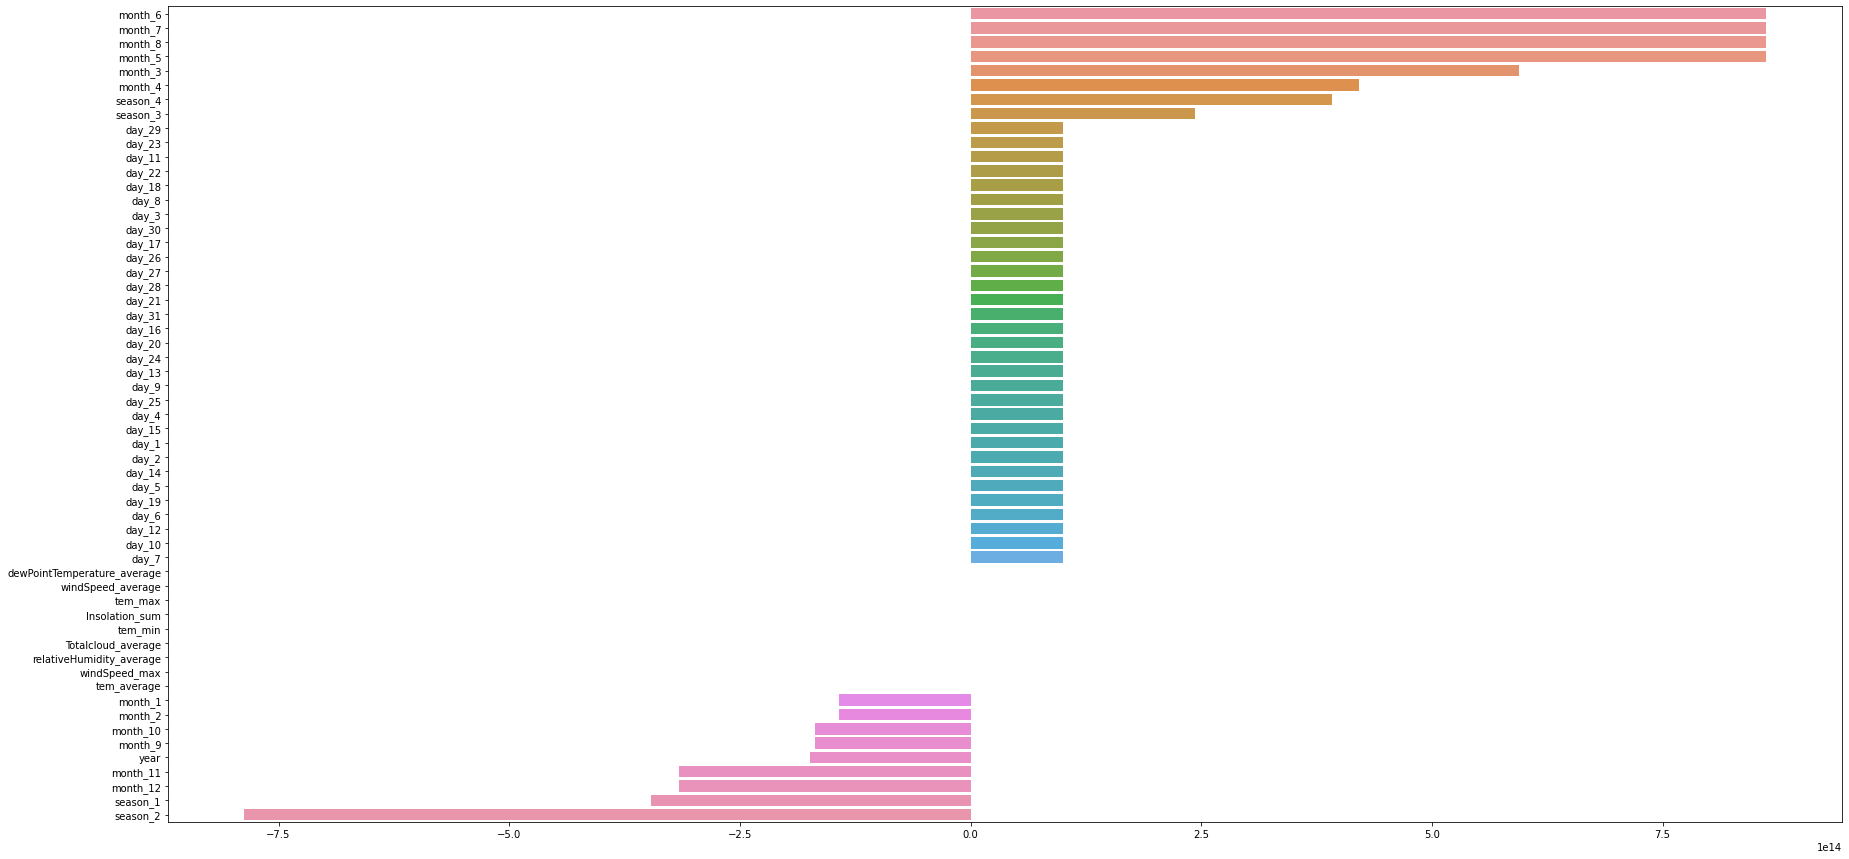

In [275]:
plt.subplots(figsize=(30,15))
coef=pd.Series(lr_reg.coef_, index=X_features_ohe.columns)
coef_sort = coef.sort_values(ascending=False)
sns.barplot(x=coef_sort.values,y=coef_sort.index)

In [297]:
corr = df.corr(method = 'pearson')
corr

,counts,tem_average,tem_min,tem_max,windSpeed_max,windSpeed_average,dewPointTemperature_average,relativeHumidity_average,Insolation_sum,Totalcloud_average,season,year,month,day
counts,1.000000,0.690049,0.644776,0.719930,-0.139845,-0.158333,0.554774,-0.050111,0.527041,-0.094651,-0.392507,-0.502788,0.264593,0.081979
tem_average,0.690049,1.000000,0.987227,0.987420,-0.236514,-0.270503,0.935466,0.304075,0.365494,0.285077,-0.502938,-0.599102,0.239309,0.039059
tem_min,0.644776,0.987227,1.000000,0.955060,-0.228596,-0.238371,0.959281,0.395199,0.264350,0.363853,-0.465047,-0.582509,0.240223,0.041591
tem_max,0.719930,0.987420,0.955060,1.000000,-0.242347,-0.294976,0.891400,0.214062,0.461004,0.188727,-0.522391,-0.591168,0.221573,0.026971
windSpeed_max,-0.139845,-0.236514,-0.228596,-0.242347,1.000000,0.836521,-0.247991,-0.126303,-0.026526,-0.097804,-0.005879,0.216942,-0.141818,0.005289
windSpeed_average,-0.158333,-0.270503,-0.238371,-0.294976,0.836521,1.000000,-0.258665,-0.086439,-0.102106,-0.014572,0.098846,0.231208,-0.076399,0.003655
dewPointTemperature_average,0.554774,0.935466,0.959281,0.891400,-0.247991,-0.258665,1.000000,0.615744,0.099368,0.460957,-0.363629,-0.563912,0.288756,0.051498
relativeHumidity_average,-0.050111,0.304075,0.395199,0.214062,-0.126303,-0.086439,0.615744,1.000000,-0.538966,0.626429,0.094201,-0.191410,0.225652,0.037345
Insolation_sum,0.527041,0.365494,0.264350,0.461004,-0.026526,-0.102106,0.099368,-0.538966,1.000000,-0.570688,-0.504524,-0.168315,-0.159041,-0.090937
Totalcloud_average,-0.094651,0.285077,0.363853,0.188727,-0.097804,-0.014572,0.460957,0.626429,-0.570688,1.000000,-0.017957,-0.132304,0.058631,0.079903


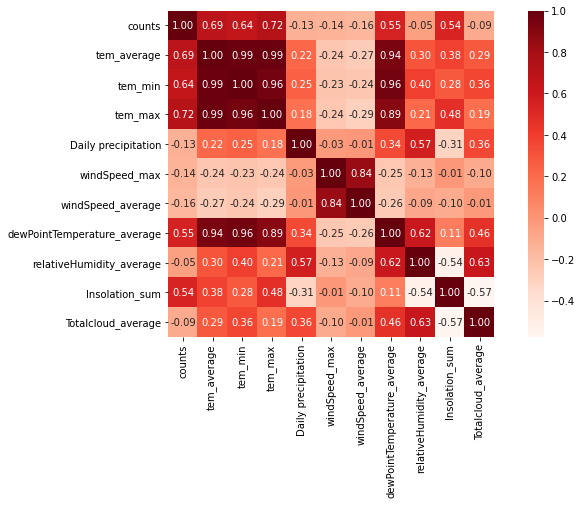

In [78]:
plt.subplots(figsize=(12,6))
df_heatmap = sns.heatmap(corr, cbar = True, annot = True, annot_kws={'size' : 10}, fmt = '.2f', square = True, cmap = 'Reds')

In [202]:
df_add = pd.get_dummies(df, columns=['year','month','day'])

In [203]:
corr = df_add.corr(method = 'pearson')
corr

,counts,tem_average,tem_min,tem_max,windSpeed_max,windSpeed_average,dewPointTemperature_average,relativeHumidity_average,Insolation_sum,Totalcloud_average,...,day_22,day_23,day_24,day_25,day_26,day_27,day_28,day_29,day_30,day_31
counts,1.000000,0.690049,0.644776,0.719930,-0.139845,-0.158333,0.554774,-0.050111,0.527041,-0.094651,...,0.034031,0.065660,0.040304,-0.011082,-0.019232,-0.004847,0.000550,0.030709,0.063264,0.014512
tem_average,0.690049,1.000000,0.987227,0.987420,-0.236514,-0.270503,0.935466,0.304075,0.365494,0.285077,...,0.012346,0.035721,0.034780,0.024896,0.011562,0.015170,-0.000674,-0.000047,0.018376,-0.000053
tem_min,0.644776,0.987227,1.000000,0.955060,-0.228596,-0.238371,0.959281,0.395199,0.264350,0.363853,...,-0.003980,0.030606,0.038826,0.018819,0.014631,0.007032,0.013701,0.008117,0.018855,-0.008984
tem_max,0.719930,0.987420,0.955060,1.000000,-0.242347,-0.294976,0.891400,0.214062,0.461004,0.188727,...,0.021683,0.037279,0.032386,0.029328,0.001958,0.018930,-0.012873,-0.010274,0.016850,-0.001381
windSpeed_max,-0.139845,-0.236514,-0.228596,-0.242347,1.000000,0.836521,-0.247991,-0.126303,-0.026526,-0.097804,...,-0.070188,0.026502,-0.030695,-0.062017,0.007436,-0.004820,0.029225,0.012883,0.034688,0.051821
windSpeed_average,-0.158333,-0.270503,-0.238371,-0.294976,0.836521,1.000000,-0.258665,-0.086439,-0.102106,-0.014572,...,-0.073642,0.043304,-0.043832,-0.080521,-0.046125,-0.030074,0.082286,-0.007143,0.060735,0.019178
dewPointTemperature_average,0.554774,0.935466,0.959281,0.891400,-0.247991,-0.258665,1.000000,0.615744,0.099368,0.460957,...,-0.000658,-0.001078,0.027847,0.031061,0.027148,0.040004,0.000180,-0.002056,0.007726,0.007979
relativeHumidity_average,-0.050111,0.304075,0.395199,0.214062,-0.126303,-0.086439,0.615744,1.000000,-0.538966,0.626429,...,-0.032059,-0.081442,-0.014348,0.032534,0.053162,0.069206,-0.009973,-0.000909,-0.031910,0.020260
Insolation_sum,0.527041,0.365494,0.264350,0.461004,-0.026526,-0.102106,0.099368,-0.538966,1.000000,-0.570688,...,0.022599,0.024134,0.011294,-0.012246,-0.063866,-0.046746,-0.065077,-0.071043,0.014467,0.008052
Totalcloud_average,-0.094651,0.285077,0.363853,0.188727,-0.097804,-0.014572,0.460957,0.626429,-0.570688,1.000000,...,0.015072,0.011016,-0.042211,-0.023962,0.113923,0.083001,0.030787,0.029266,-0.004801,-0.048326


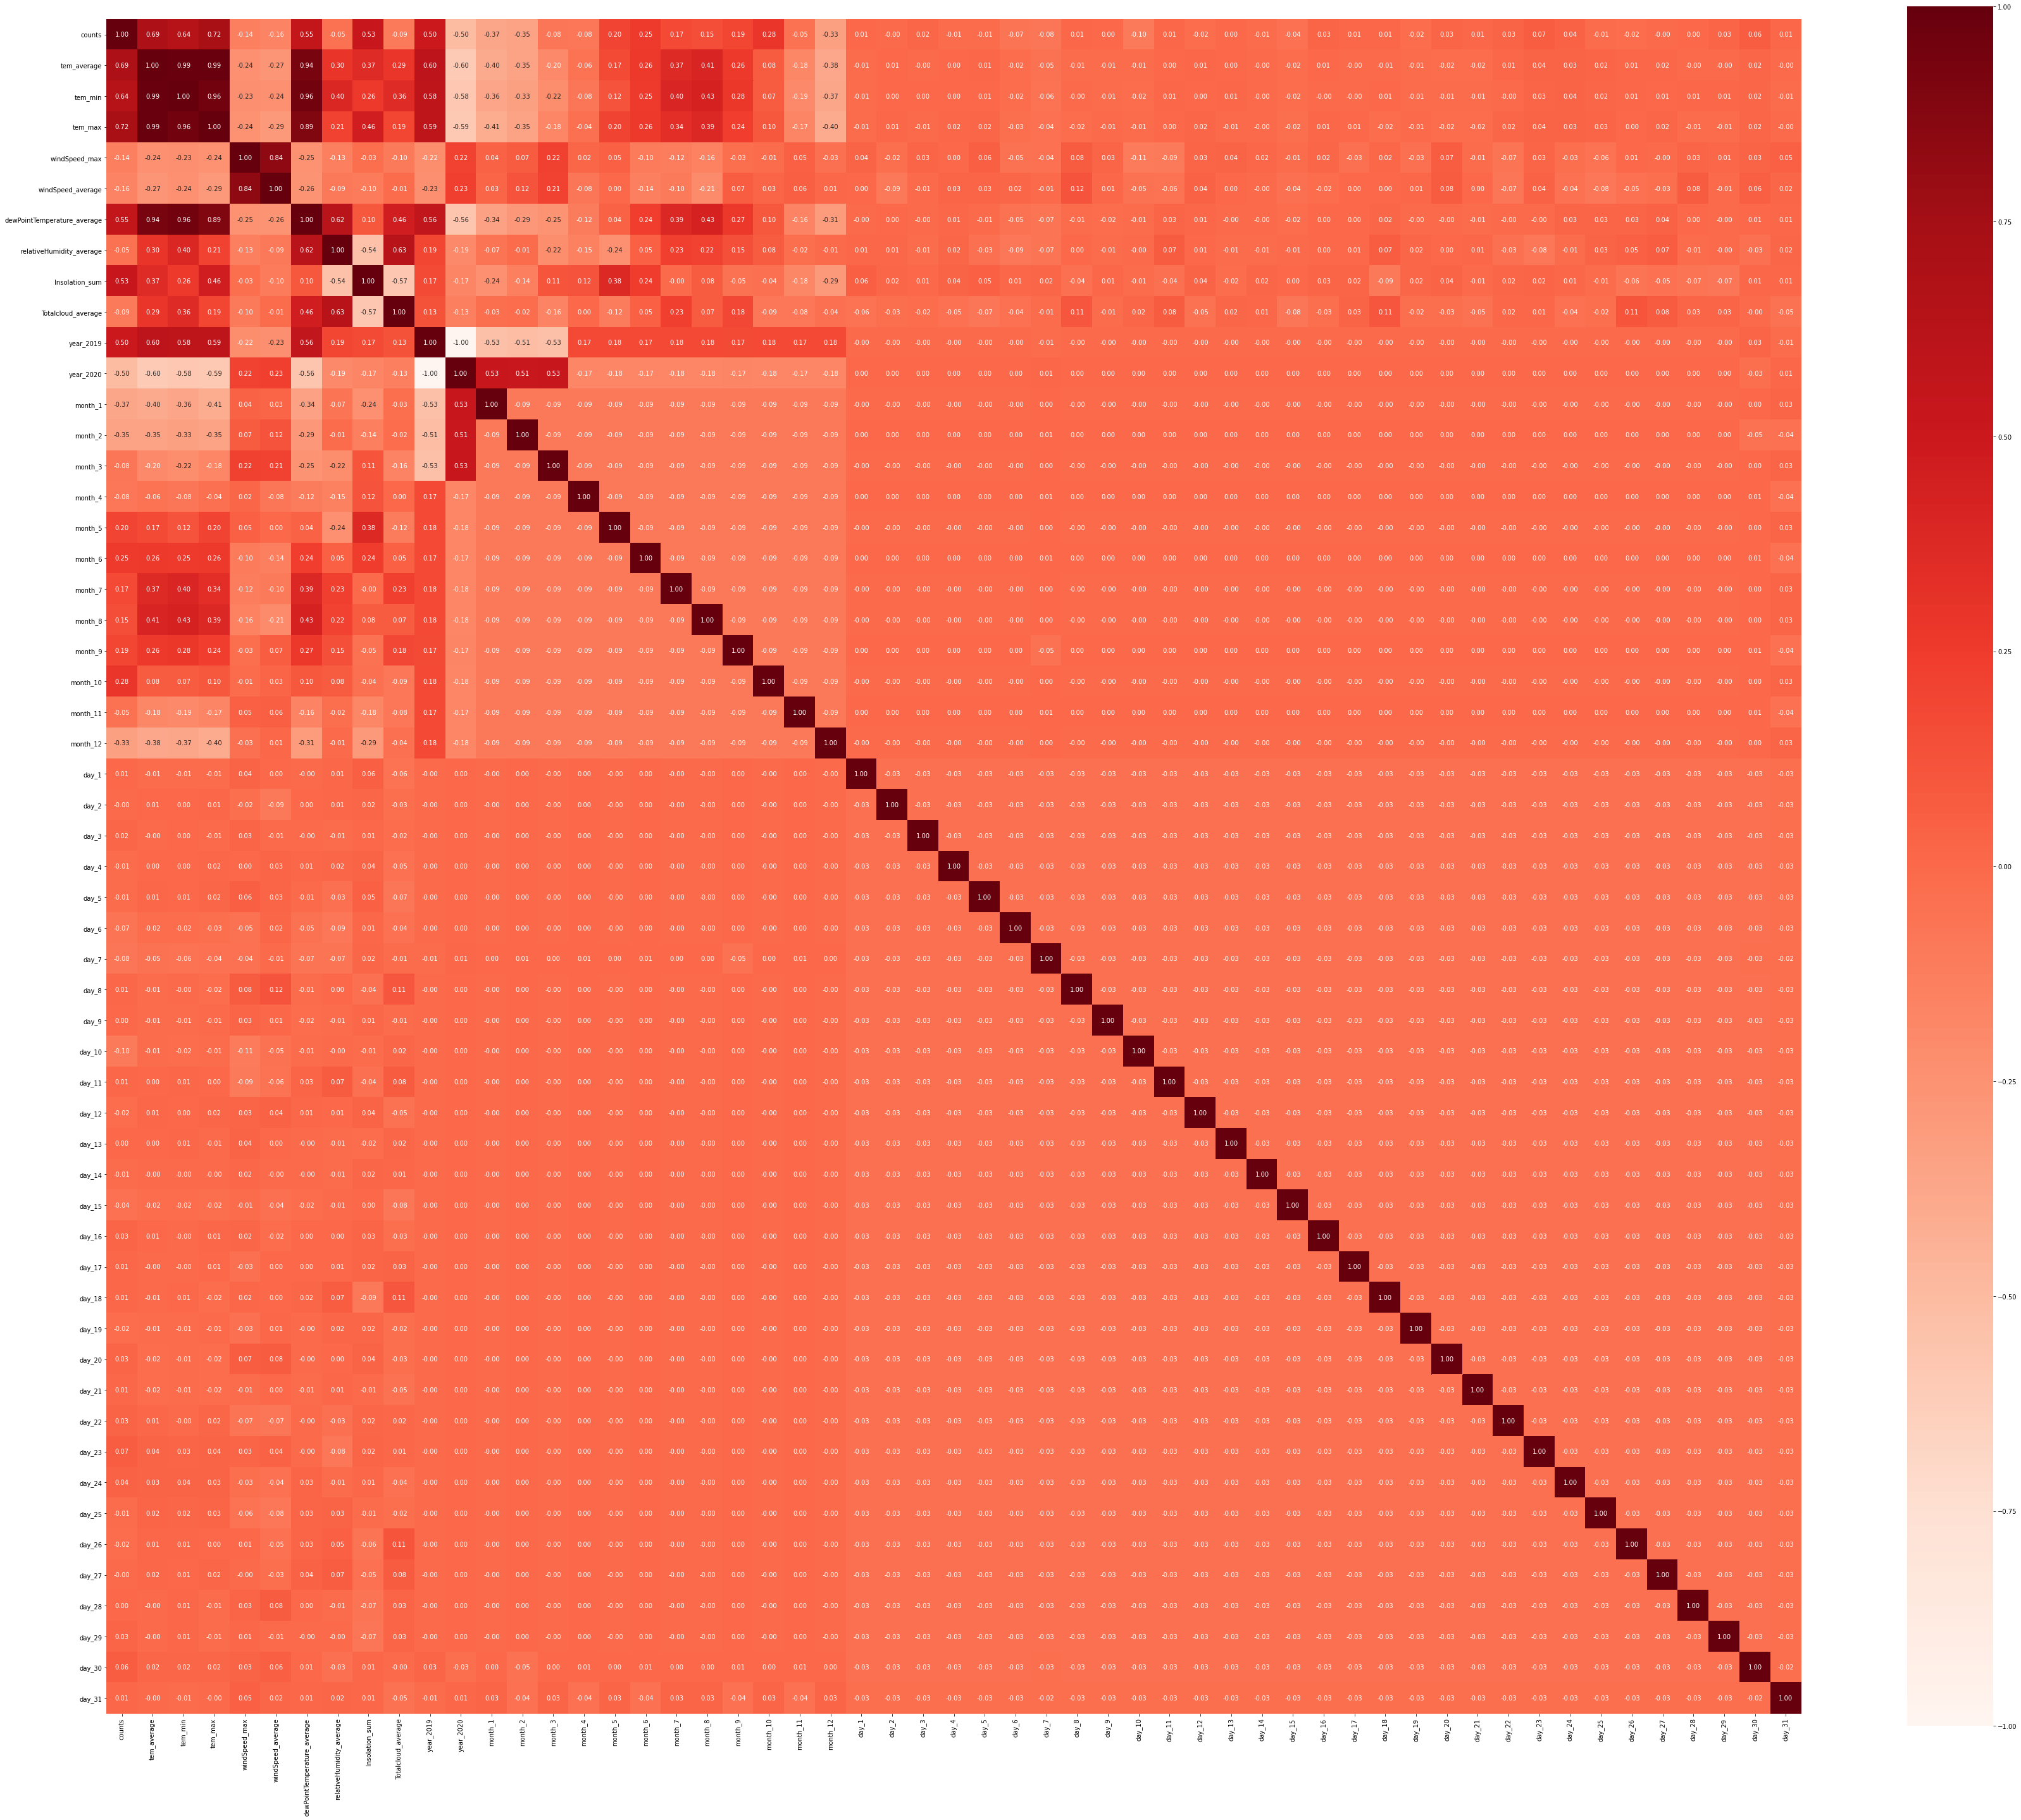

In [204]:
plt.subplots(figsize=(60,50))
df_heatmap = sns.heatmap(corr, cbar = True, annot = True, annot_kws={'size' : 10}, fmt = '.2f', square = True, cmap = 'Reds')

0      37660
1      42029
2      43257
3      45681
4      45643
       ...  
360    60183
361    64677
362    68430
363    69293
364    74621
Name: counts, Length: 365, dtype: int64